In [ ]:
!pip install qiskit-terra==0.24.1 qiskit-aer==0.12.0 qiskit-ibmq-provider==0.20.2 qiskit==0.43.1 qiskit-machine-learning==0.6.1

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.7/148.7 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 120.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 62.5 MB/s eta 0:00:00
  Created wheel for qiskit: filename=qiskit-0.43.1-py3-none-any.whl size=8142 sha256=67accb9366ea0664a32a06edebe08b0a2213ea1482137fd36e854ae32d6ebddd
  Stored in directory: /root/.cache/pip/wheels/95/97/09/9b15af04f453e18fe251b496beca9c41f77dc53a8d0e978e57
  Created

In [ ]:

%%capture

!pip install qiskit qiskit_machine_learning qiskit_algorithms


In [ ]:
%%capture
!pip install qiskit
!pip install qiskit_machine_learning
!pip install qiskit-aer

In [ ]:


import time
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit_algorithms.optimizers import COBYLA
from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit.primitives import BackendSampler
from functools import partial
from qiskit_aer import Aer

from qiskit_machine_learning.neural_networks import SamplerQNN
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit.primitives import BackendSampler

import numpy as np
import time
from IPython.display import clear_output
import matplotlib.pyplot as plt
from qiskit_algorithms.utils import algorithm_globals # Import algorithm_globals

# Set random seed for reproducibility using algorithm_globals
algorithm_globals.random_seed = 42  # Set seed globally

import matplotlib.pyplot as plt
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes

from qiskit_machine_learning.neural_networks import SamplerQNN
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier
from qiskit_algorithms.optimizers import SPSA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import time
from IPython.display import clear_output

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes

from qiskit_machine_learning.neural_networks import SamplerQNN
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier
from qiskit_algorithms.optimizers import SPSA
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time



import numpy as np
import matplotlib.pyplot as plt
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes

from qiskit_machine_learning.neural_networks import SamplerQNN
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import time
from IPython.display import clear_output
from qiskit_algorithms.optimizers import SPSA

from qiskit_algorithms.utils import algorithm_globals # Import algorithm_globals


# Set random seed for reproducibility using algorithm_globals
algorithm_globals.random_seed = 42  # Set seed globally

In [ ]:
# Callback function to capture the loss values
objective_func_vals = []  # Global list to store loss values
learning_rates = []
perturbations = []

#-------Split data for federated Setting--------#
num_epochs = 10
max_train_iterations = 50
samples_per_epoch=50
#backend = Aer.get_backend('aer_simulator')


# Configuration variables
num_clients = 5
num_federated_layers = 10
num_deep_unfolding_iterations = 5
initial_learning_rate = 0.15

initial_perturbation = 0.15
momentum = 0.95
gradient_moving_avg = 0

# Define federated learning with accuracy tracking
#num_features = 5
global_model_weights, global_model_accuracy = {}, []
clients_train_accuracies, clients_test_accuracies = [], []

# Define the federated learning parameters



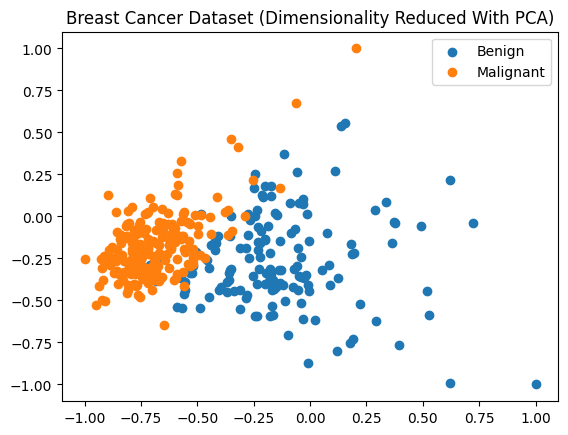

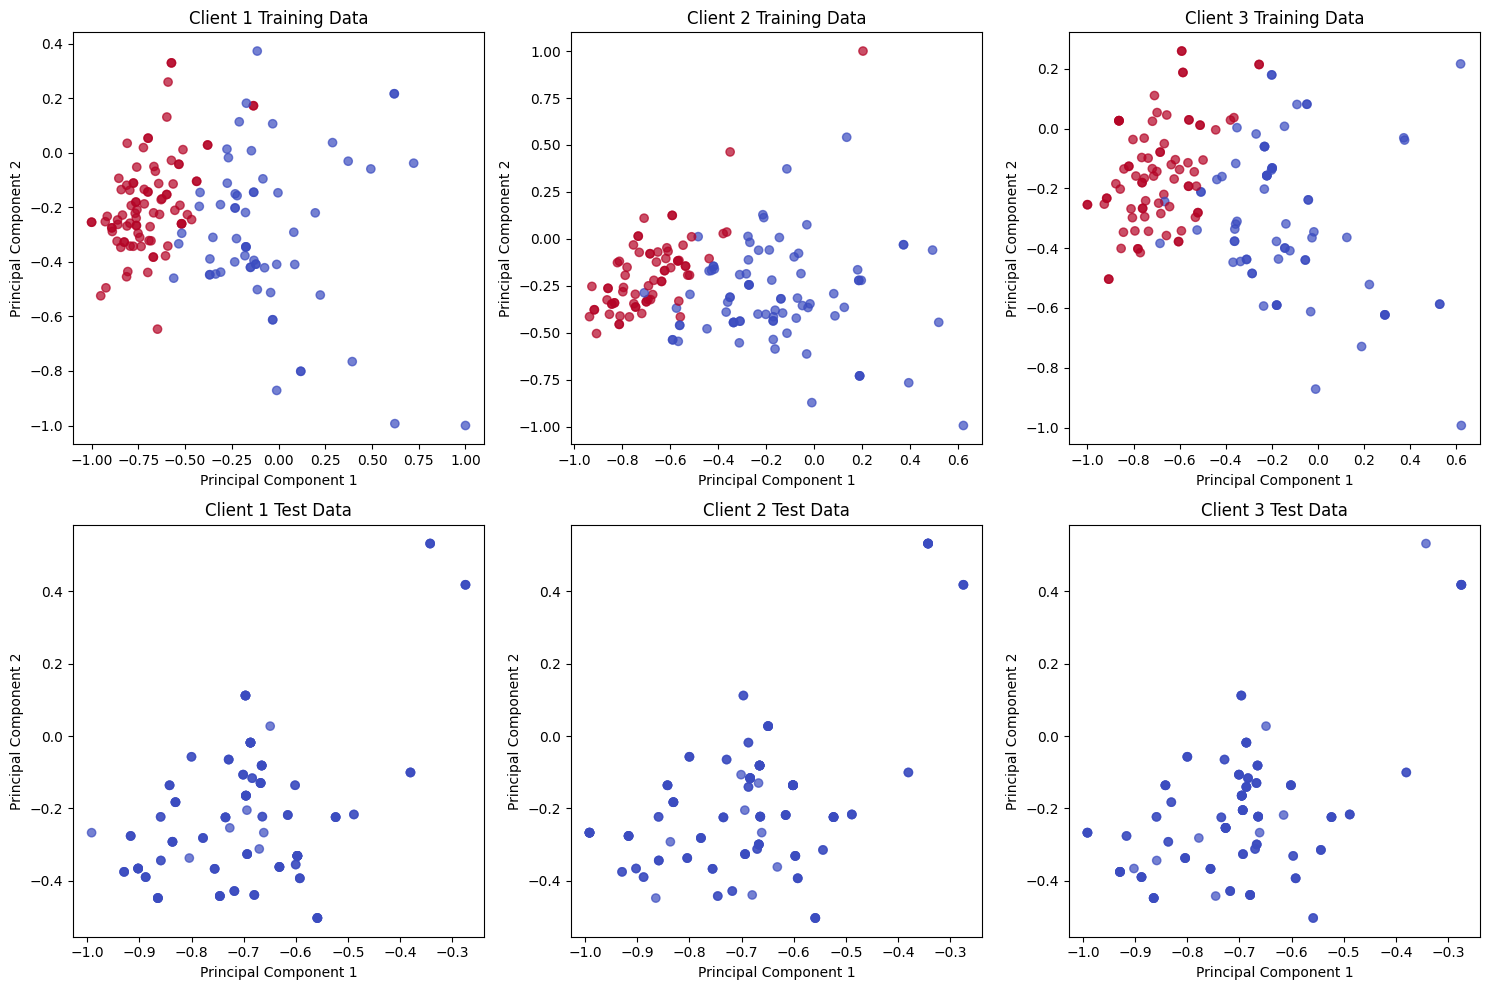

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

# Function to preprocess breast cancer dataset
def breast_cancer(training_size, test_size, n, PLOT_DATA=True):
    class_labels = [r'Benign', r'Malignant']

    # Load the dataset
    cancer = datasets.load_breast_cancer()

    # Split into training and testing datasets
    X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=109)

    # Standardize features to fit a normal distribution
    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    # Reduce dimensions to `n` principal components
    pca = PCA(n_components=n).fit(X_train)
    X_train = pca.transform(X_train)
    X_test = pca.transform(X_test)

    # Scale data between -1 and 1
    samples = np.append(X_train, X_test, axis=0)
    minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
    X_train = minmax_scale.transform(X_train)
    X_test = minmax_scale.transform(X_test)

    # Prepare training and testing data
    training_input = {key: (X_train[Y_train == k, :])[:training_size] for k, key in enumerate(class_labels)}
    test_input = {key: (X_train[Y_train == k, :])[training_size:(training_size + test_size)] for k, key in enumerate(class_labels)}

    if PLOT_DATA:
        for k in range(0, 2):
            x_axis_data = X_train[Y_train == k, 0][:training_size]
            y_axis_data = X_train[Y_train == k, 1][:training_size]
            label = 'Malignant' if k == 1 else 'Benign'
            plt.scatter(x_axis_data, y_axis_data, label=label)

        plt.title("Breast Cancer Dataset (Dimensionality Reduced With PCA)")
        plt.legend()
        plt.show()

    return X_train, training_input, test_input, class_labels

# Function to split dataset into data and labels
def split_dataset_to_data_and_labels(input_data):
    data = []
    labels = []
    for label, features in input_data.items():
        data.append(features)
        if label == 'Benign':
            labels.append([0] * len(features))
        else:
            labels.append([1] * len(features))
    return np.vstack(data), np.hstack(labels)

# Function to assign overlapping random portions of data to clients
def assign_random_data_to_clients(data, labels, num_clients, data_per_client):
    """
    Assign overlapping random portions of the dataset to each client.

    Parameters:
    - data: NumPy array of data points.
    - labels: NumPy array of corresponding labels.
    - num_clients: Number of clients.
    - data_per_client: Number of samples per client.

    Returns:
    - client_data: List of data arrays for each client.
    - client_labels: List of label arrays for each client.
    """
    client_data = []
    client_labels = []
    for _ in range(num_clients):
        indices = np.random.choice(len(data), data_per_client, replace=True)  # Allow overlap
        client_data.append(data[indices])
        client_labels.append(labels[indices])
    return client_data, client_labels

# Set parameters
n = 2  # Number of principal components
training_dataset_size = 200
testing_dataset_size = 100
num_clients = 3
data_per_client = 150  # Number of samples each client should have

# Preprocess the dataset
sample_Total, training_input, test_input, class_labels = breast_cancer(training_dataset_size, testing_dataset_size, n)

# Split training and test datasets into data and labels
data_train, train_labels = split_dataset_to_data_and_labels(training_input)
data_test, test_labels = split_dataset_to_data_and_labels(test_input)

# Assign random data portions to clients for both training and test data
client_data, client_labels = assign_random_data_to_clients(data_train, train_labels, num_clients, data_per_client)
client_test_data, client_test_labels = assign_random_data_to_clients(data_test, test_labels, num_clients, data_per_client)

# Visualize training and test data for each client
fig, axes = plt.subplots(2, num_clients, figsize=(15, 10))

for i in range(num_clients):
    # Plot training data
    axes[0, i].scatter(client_data[i][:, 0], client_data[i][:, 1], c=client_labels[i], cmap="coolwarm", alpha=0.7)
    axes[0, i].set_title(f"Client {i+1} Training Data")
    axes[0, i].set_xlabel("Principal Component 1")
    axes[0, i].set_ylabel("Principal Component 2")

    # Plot test data
    axes[1, i].scatter(client_test_data[i][:, 0], client_test_data[i][:, 1], c=client_test_labels[i], cmap="coolwarm", alpha=0.7)
    axes[1, i].set_title(f"Client {i+1} Test Data")
    axes[1, i].set_xlabel("Principal Component 1")
    axes[1, i].set_ylabel("Principal Component 2")

plt.tight_layout()
plt.show()


In [ ]:
def assign_noniid_label_skewed_disjoint_clients(data, labels, num_clients, skew_ratio=0.8):
    """
    Assigns breast cancer data to clients non-IIDly without overlap.

    Each client gets skew_ratio% from one class and the rest from the other.

    Parameters:
    - data: feature matrix
    - labels: label vector
    - skew_ratio: e.g. 0.8 means 80% of one class
    """
    client_data = []
    client_labels = []

    # Separate by class
    idx_0 = np.where(labels == 0)[0]
    idx_1 = np.where(labels == 1)[0]
    data_0, data_1 = data[idx_0], data[idx_1]

    # Shuffle indices (but deterministic)
    np.random.seed(42)
    np.random.shuffle(data_0)
    np.random.shuffle(data_1)

    # Determine number of samples per client
    total_0 = len(data_0)
    total_1 = len(data_1)
    samples_per_client = min((total_0 + total_1) // num_clients, len(data) // num_clients)

    # Counters to track used data
    ptr_0 = 0
    ptr_1 = 0

    for client_id in range(num_clients):
        dom_label = 0 if client_id % 2 == 0 else 1
        dom_count = int(samples_per_client * skew_ratio)
        other_count = samples_per_client - dom_count

        if dom_label == 0:
            client_dom_data = data_0[ptr_0:ptr_0 + dom_count]
            client_other_data = data_1[ptr_1:ptr_1 + other_count]
            client_dom_labels = [0] * len(client_dom_data)
            client_other_labels = [1] * len(client_other_data)
            ptr_0 += dom_count
            ptr_1 += other_count
        else:
            client_dom_data = data_1[ptr_1:ptr_1 + dom_count]
            client_other_data = data_0[ptr_0:ptr_0 + other_count]
            client_dom_labels = [1] * len(client_dom_data)
            client_other_labels = [0] * len(client_other_data)
            ptr_1 += dom_count
            ptr_0 += other_count

        full_data = np.vstack([client_dom_data, client_other_data])
        full_labels = np.array(client_dom_labels + client_other_labels)
        client_data.append(full_data)
        client_labels.append(full_labels)

    return client_data, client_labels


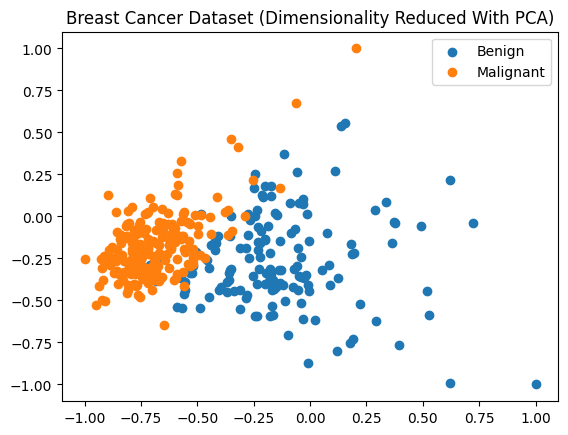

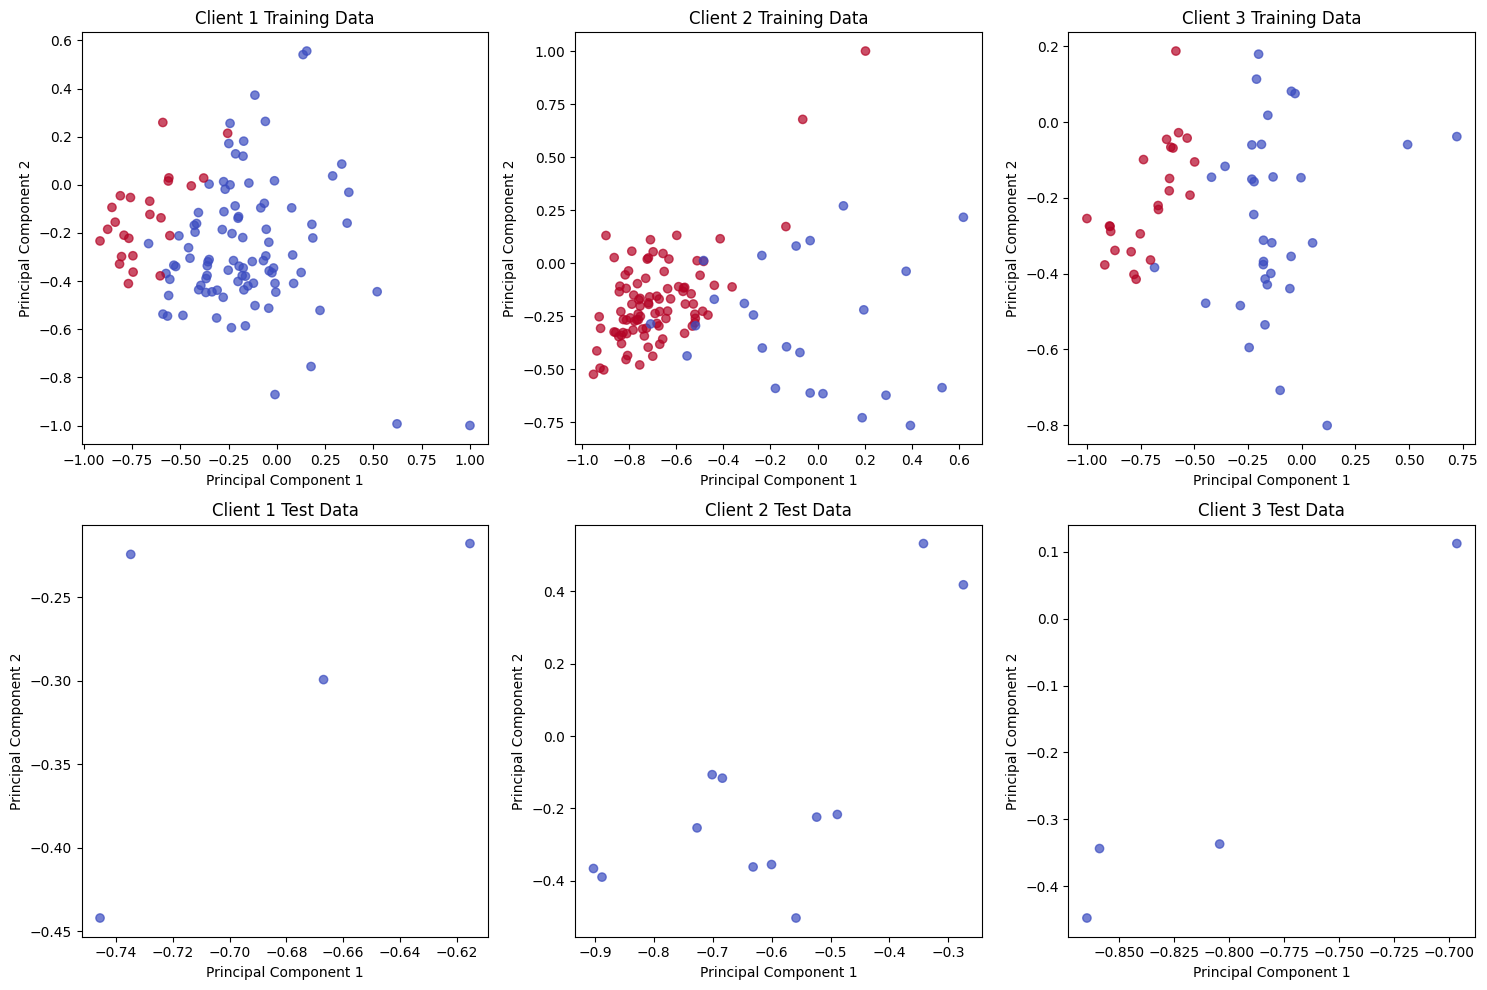

In [ ]:
# Function to assign overlapping random portions of data to clients
def assign_random_data_to_clients(data, labels, num_clients, data_per_client):
    """
    Assign overlapping random portions of the dataset to each client.

    Parameters:
    - data: NumPy array of data points.
    - labels: NumPy array of corresponding labels.
    - num_clients: Number of clients.
    - data_per_client: Number of samples per client.

    Returns:
    - client_data: List of data arrays for each client.
    - client_labels: List of label arrays for each client.
    """
    client_data = []
    client_labels = []
    for _ in range(num_clients):
        indices = np.random.choice(len(data), data_per_client, replace=True)  # Allow overlap
        client_data.append(data[indices])
        client_labels.append(labels[indices])
    return client_data, client_labels

# Set parameters
n = 2  # Number of principal components
training_dataset_size = 200
testing_dataset_size = 100
num_clients = 3
data_per_client = 150  # Number of samples each client should have

# Preprocess the dataset
sample_Total, training_input, test_input, class_labels = breast_cancer(training_dataset_size, testing_dataset_size, n)

# Split training and test datasets into data and labels
data_train, train_labels = split_dataset_to_data_and_labels(training_input)
data_test, test_labels = split_dataset_to_data_and_labels(test_input)

# Assign random data portions to clients for both training and test data
client_data, client_labels = assign_noniid_label_skewed_disjoint_clients(data_train, train_labels, num_clients, skew_ratio=0.8)
client_test_data, client_test_labels = assign_noniid_label_skewed_disjoint_clients(data_test, test_labels, num_clients, skew_ratio=0.8)

# Visualize training and test data for each client
fig, axes = plt.subplots(2, num_clients, figsize=(15, 10))

for i in range(num_clients):
    # Plot training data
    axes[0, i].scatter(client_data[i][:, 0], client_data[i][:, 1], c=client_labels[i], cmap="coolwarm", alpha=0.7)
    axes[0, i].set_title(f"Client {i+1} Training Data")
    axes[0, i].set_xlabel("Principal Component 1")
    axes[0, i].set_ylabel("Principal Component 2")

    # Plot test data
    axes[1, i].scatter(client_test_data[i][:, 0], client_test_data[i][:, 1], c=client_test_labels[i], cmap="coolwarm", alpha=0.7)
    axes[1, i].set_title(f"Client {i+1} Test Data")
    axes[1, i].set_xlabel("Principal Component 1")
    axes[1, i].set_ylabel("Principal Component 2")

plt.tight_layout()
plt.show()


# ------------------------- Bar Chart of Label Distribution -------------------------
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
clients = np.arange(num_clients)

label_0_counts = [np.sum(labels == 0) for labels in client_labels]
label_1_counts = [np.sum(labels == 1) for labels in client_labels]

ax.bar(clients - bar_width/2, label_0_counts, width=bar_width, label='Benign (Label 0)', color='red')
ax.bar(clients + bar_width/2, label_1_counts, width=bar_width, label='Malignant (Label 1)', color='green')

ax.set_xlabel('Client ID')
ax.set_ylabel('Number of Samples')
ax.set_title('Label Distribution per Client (Training Data)')
ax.set_xticks(clients)
ax.set_xticklabels([f'Client {i+1}' for i in clients])
ax.legend()
plt.tight_layout()
plt.show()



Deep unfolding per client - Local Training with DUN

In [ ]:

import os  # For handling directories

# Define the directory to save the plots
output_dir = "federated_round_plots"
os.makedirs(output_dir, exist_ok=True)  # Create the directory if it doesn't exist
# Initialize a global variable to track the round number
current_round = 1
# Callback for visualization, gradient smoothing, and learning rate adjustment in deep unfolding
def deep_unfolding_learning_rate_adjustment(parameters, obj_func_eval, gradients=None,round_number=0):
    global gradient_moving_avg, learning_rates, perturbations,current_round

    clear_output(wait=True)

    # Save the objective function value for visualization
    objective_func_vals.append(obj_func_eval)

    # If gradients are provided, smooth the gradient using momentum
    if gradients is not None:
        gradient_moving_avg = momentum * gradient_moving_avg + (1 - momentum) * gradients  # Apply moving average
        delta_lr = 0.05 * gradient_moving_avg  # Adjust learning rate based on the smoothed gradient
        delta_perturbation = 0.1 * gradient_moving_avg  # Adjust perturbation based on the same gradient
    else:
        delta_lr = 0  # No gradient info available in this iteration
        delta_perturbation = 0

    # Update learning rate and perturbation
    if len(learning_rates) > 0:
        new_lr = max(0.001, learning_rates[-1] + delta_lr)  # Ensure learning rate is positive and non-zero
        new_perturbation = max(0.001, perturbations[-1] + delta_perturbation)  # Ensure perturbation is positive
    else:
        new_lr = initial_learning_rate
        new_perturbation = initial_perturbation

    learning_rates.append(new_lr)
    perturbations.append(new_perturbation)

    import matplotlib.pyplot as plt

    # Visualization of learning rate and perturbation
    plt.figure(figsize=(10, 12))  # Adjust figure size for better spacing

    # Plot Objective Function Value
    plt.subplot(3, 1, 1)
    plt.plot(range(len(objective_func_vals)), objective_func_vals, label="Objective Function Value", color='blue')
    plt.xlabel("Iteration")
    plt.ylabel("Objective Function Value")
    plt.title("Objective Function Over Iterations")
    plt.legend(loc="best")
    plt.grid(True)  # Add grid for better readability

    # Plot Learning Rate
    plt.subplot(3, 1, 2)
    plt.plot(range(len(learning_rates)), learning_rates, label="Learning Rate", color='green')
    plt.xlabel("Iteration")
    plt.ylabel("Learning Rate")
    plt.title("Learning Rate Over Iterations")
    plt.legend(loc="best")
    plt.grid(True)

    # Plot Perturbation
    plt.subplot(3, 1, 3)
    plt.plot(range(len(perturbations)), perturbations, label="Perturbation", color='red')
    plt.xlabel("Iteration")
    plt.ylabel("Perturbation")
    plt.title("Perturbation Over Iterations")
    plt.legend(loc="best")
    plt.grid(True)

    plt.tight_layout(pad=3.0)  # Add padding between subplots
    # Save the plot after each federated round
    #plot_filename = os.path.join(output_dir, f"federated_round_{current_round}.png")
    #plt.savefig(plot_filename)  # Save the figure
    #plt.show()
    plt.close()  # Close the plot to free memory

    # Increment the round number for the next call
    current_round += 1



In [ ]:


# Define the SPSA callback to capture gradients and update learning rate and perturbation dynamically
def spsa_callback(nfev, parameters, obj_func_eval, stepsize, accept):
    # Assuming `stepsize` contains gradient information or its approximation
    gradients = stepsize
    deep_unfolding_learning_rate_adjustment(parameters, obj_func_eval, gradients)


In [ ]:
# Custom SPSA optimizer with learnable learning rate and perturbation
class LearnableLRPerturbationSPSA(SPSA):
    def __init__(self, initial_lr=0.15, initial_perturbation=0.15, lr_alpha=0.1, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.lr = initial_lr  # Initial learning rate
        self.perturbation = initial_perturbation  # Initial perturbation
        self.lr_alpha = lr_alpha  # Learning rate and perturbation update speed

    def _update_learning_rate_and_perturbation(self, gradient, obj_func_eval):
        """
        Update both learning rate and perturbation based on gradient and objective function evaluation.
        The learning rate increases if the objective function improves and decreases otherwise.
        """
        # Use the gradient sign to determine if we should increase or decrease
        grad_lr = np.sign(np.mean(gradient))  # Average gradient sign across parameters

        if grad_lr > 0:  # Objective function is improving
            self.lr += self.lr_alpha * abs(grad_lr)  # Increase learning rate
            self.perturbation += self.lr_alpha * abs(grad_lr)  # Increase perturbation
        else:  # Objective function is getting worse
            self.lr -= self.lr_alpha * abs(grad_lr)  # Decrease learning rate
            self.perturbation -= self.lr_alpha * abs(grad_lr)  # Decrease perturbation

        # Ensure both learning rate and perturbation are positive
        self.lr = max(0.001, self.lr)
        self.perturbation = max(0.001, self.perturbation)

In [ ]:
    def step(self, gradient, obj_func_eval):
        """
        Perform optimization step for both parameters, learning rate, and perturbation.
        Use the objective function evaluation to dynamically adjust learning rate and perturbation.
        """
        self._update_learning_rate_and_perturbation(gradient, obj_func_eval)
        return super().step(gradient)  # Perform SPSA step for parameters

    def reset(self):
        """
        Reset the optimizer state (learning rates, perturbations, and gradient moving averages) for the next round.
        """
        self.lr = initial_learning_rate
        self.perturbation = initial_perturbation
        self.gradient_moving_avg = 0  # Reset the moving average of the gradient
        learning_rates.clear()  # Reset the learning rates history
        perturbations.clear()  # Reset the perturbations history
        objective_func_vals.clear()  # Clear the objective function history

In [ ]:
# Create optimizer with learnable learning rate and perturbation
spsa_optimizer = LearnableLRPerturbationSPSA(
      maxiter=50, learning_rate=initial_learning_rate, perturbation=initial_perturbation, callback=spsa_callback, lr_alpha=0.01
)

Initialize QNN model for each client at the start of the Federated Round

In [ ]:
#======================================================
# Initialize QNN model
def initialize_model(num_features,initial_params):
    feature_map = ZZFeatureMap(feature_dimension=num_features, reps=2)
    ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
    qc = feature_map.compose(ansatz)


    # Create optimizer with learnable learning rate and perturbation
    spsa_optimizer = LearnableLRPerturbationSPSA(
      maxiter=50, learning_rate=initial_learning_rate, perturbation=initial_perturbation, callback=spsa_callback, lr_alpha=0.01
)
    def parity(x):
        return "{:b}".format(x).count("1") % 2

    sampler_qnn = SamplerQNN(
        circuit=qc,
        interpret=parity,
        output_shape=2,
        input_params=feature_map.parameters,
        weight_params=ansatz.parameters
    )


    # Define the neural network classifier
    qnn_classifier = NeuralNetworkClassifier(
      neural_network=sampler_qnn,
      optimizer=spsa_optimizer,
      loss='squared_error',
      initial_point=initial_params,  # Initialize with the starting parameters
)


    return qnn_classifier

Save Results in Drive for Local Training for Each Client

In [ ]:
#=====================================================
from google.colab import drive
import csv
# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Define the save path in Google Drive
csv_file = '/content/drive/My Drive/DQFL_local_BreastCancer.csv'

# Step 3: Define headers for the CSV
headers = ["Federated Round", "Client Number", "Iteration", "Objective Function Value",
           "Training Accuracy", "Test Accuracy", "Learning Rate", "Perturbation"]

# Open the CSV file and write headers if it's the first time writing to the file
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(headers)

# Example of saving results for each federated round and client
def save_results(federated_round, client_id, iteration, obj_func_val, train_acc, test_acc, learning_rate, perturbation):
    with open(csv_file, mode='a', newline='') as file:  # Open file in append mode
        writer = csv.writer(file)
        writer.writerow([federated_round, client_id, iteration, obj_func_val, train_acc, test_acc, learning_rate, perturbation])
#=====================================================

Mounted at /content/drive


In [ ]:
# Convert client data and labels into dictionaries
clients = []
for i in range(num_clients):
    clients.append({
        "train_data": {"data": client_data[i], "labels": client_labels[i]},
        "test_data": {"data": client_test_data[i], "labels": client_test_labels[i]}
    })

# Display information about the data assigned to each client, including epoch-wise splits
for idx, client in enumerate(clients):
    print(f"Client {idx + 1}:")
    for epoch in range(num_epochs):
        print(f"  Epoch {epoch + 1}: Train data samples: {len(client['train_data']['data'])}")  # Access train data from dictionary
    print(f"  Test data samples: {len(client['test_data']['data'])}")  # Access test data from dictionary

Client 1:
  Epoch 1: Train data samples: 116
  Epoch 2: Train data samples: 116
  Epoch 3: Train data samples: 116
  Epoch 4: Train data samples: 116
  Epoch 5: Train data samples: 116
  Epoch 6: Train data samples: 116
  Epoch 7: Train data samples: 116
  Epoch 8: Train data samples: 116
  Epoch 9: Train data samples: 116
  Epoch 10: Train data samples: 116
  Test data samples: 4
Client 2:
  Epoch 1: Train data samples: 116
  Epoch 2: Train data samples: 116
  Epoch 3: Train data samples: 116
  Epoch 4: Train data samples: 116
  Epoch 5: Train data samples: 116
  Epoch 6: Train data samples: 116
  Epoch 7: Train data samples: 116
  Epoch 8: Train data samples: 116
  Epoch 9: Train data samples: 116
  Epoch 10: Train data samples: 116
  Test data samples: 12
Client 3:
  Epoch 1: Train data samples: 57
  Epoch 2: Train data samples: 57
  Epoch 3: Train data samples: 57
  Epoch 4: Train data samples: 57
  Epoch 5: Train data samples: 57
  Epoch 6: Train data samples: 57
  Epoch 7: Train 

Train Each Client

In [ ]:
#=====================================================
# Federated learning loop per client
def train_qnn_model(client_data, client_test_data, model=None, client_id=None, layer=None):

    global learning_rates, perturbations, objective_func_vals
    """
    Train the QNN model for a specific client.

    Parameters:
    - client_data: Dictionary with "data" and "labels" keys for training.
    - client_test_data: Dictionary with "data" and "labels" keys for testing.
    - model: Existing model to train; if None, a new model will be initialized.
    - client_id: ID of the client (optional, for logging).
    - layer: Current layer/epoch in federated learning (optional, for logging).

    Returns:
    - model: Trained QNN model.
    - train_accuracy: Training accuracy.
    - test_accuracy: Test accuracy.
    - total_time: Time taken for training.
    """
    # Get the number of features
    num_features = client_data["data"].shape[1]
    print(f"Client {client_id} - Number of features: {num_features}")

    #initial_params = np.random.rand(RealAmplitudes(client_data.shape[1], reps=4).num_parameters)  # Initialize params
    initial_params = np.random.rand(RealAmplitudes(num_features, reps=3).num_parameters) #Modified this line

    if model is None:
        model = initialize_model(num_features, initial_params)

    train_sequences = client_data["data"] #Modified this line
    train_labels = client_data["labels"] #Modified this line
            # Replace with direct indexing for test data
   # Replace with direct indexing for test data
    test_sequences = client_test_data["data"]  # Assuming you want the data part
    test_labels = client_test_data["labels"]  # Assuming labels are part of client_test_data



    train_accuracies, test_accuracies, total_time = [], [], 0

    train_accuracies = []
    test_accuracies = []

    # Deep Unfolding with multiple iterations
    # Continue training with learned weights and adjust learning rate based on performance and gradients.
    total_time = 0
    current_params = initial_params  # Start with the initial parameters

    for i in range(num_deep_unfolding_iterations):
        print("\n")
        print(f"Deep Unfolding Iteration {i+1}/{num_deep_unfolding_iterations}")
        start_time = time.time()
        model.fit(train_sequences, train_labels)
        end_time = time.time()
        total_time += end_time - start_time

        # After training, retrieve the updated parameters from the optimizer
        current_params = model.weights
        print(f"Trained parameters after iteration {i+1}: {current_params}")

        # Store final weights and learning rate for next round
        final_learning_rate = learning_rates[-1]
        final_perturbation = perturbations[-1]

        # Evaluate the model performance
        train_accuracy = model.score(train_sequences, train_labels)
        test_accuracy = model.score(test_sequences, test_labels)

        # Store accuracies for future reference
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)


        # Write the results to the CSV file
        save_results(layer, client_id, i+1, objective_func_vals[-1], train_accuracy * 100, test_accuracy * 100, final_learning_rate, final_perturbation)

        #with open(csv_file, mode='a', newline='') as file:
          #writer = csv.writer(file)
         #writer.writerow([i+1, objective_func_vals[-1], train_accuracy * 100, test_accuracy * 100, final_learning_rate, final_perturbation])

        # Update the learning rate for the next iteration based on gradients from SPSA
        spsa_optimizer.learning_rate = learning_rates[-1]
        model.initial_point = current_params

        # Log performance
        print(f"Iteration {i+1} - Learning Rate: {final_learning_rate:.6f}")
        print(f"Iteration {i+1} - Training Accuracy: {train_accuracy * 100:.2f}%")
        print(f"Iteration {i+1} - Test Accuracy: {test_accuracy * 100:.2f}%")

    return model, train_accuracy, test_accuracy, total_time



In [ ]:
# Step to empty the CSV file before starting a new run
def clear_csv_file():
    """
    Clears the CSV file by overwriting it with headers or leaving it blank.
    """
    with open(csv_file, mode='w', newline='') as file:
        writer = csv.writer(file)
        # Uncomment the next line to write headers for the new run
        writer.writerow(headers)
        # Leave it blank if you prefer not to include headers
        # pass


In [ ]:
def get_accuracy(model, test_sequences, test_labels):
    """
    Evaluate the accuracy of the given model on the test dataset.

    Parameters:
        model: The trained model to evaluate.
        num_features: The number of features in each data sample.
        test_sequences: A list or array of test input data (features).
        test_labels: A list or array of true labels corresponding to the test data.

    Returns:
        float: The accuracy of the model as a percentage.
    """
    test_accuracy = model.score(test_sequences, test_labels)
    return test_accuracy

# Function to extract numerical values of parameters
def extract_param_values(model):
    #param_values = []
    # Loop through each parameter in the circuit and get its bound value
    # Retrieve the circuit from the neural network
    circuit = model.neural_network.circuit

    # Extract the parameter values bound to the circuit
    # Use enumerate to get both index and parameter
    param_values = {param: circuit.parameters[i] for i, param in enumerate(circuit.parameters)}
    return param_values
#def set_param_values(model, param_values):
    # Retrieve the circuit from the neural network
    #circuit = model.neural_network.circuit

    # Use assign_parameters to update the parameter values
    #circuit.assign_parameters(param_values, inplace=True)
# Function to set numerical values of parameters back into the circuit
def set_param_values(model, param_values):
    # Assign the averaged parameter values back to the circuit
    parameter_dict = {param: value for param, value in zip(model.neural_network.circuit.parameters, param_values)}
    model.neural_network.circuit.assign_parameters(parameter_dict)


# Manually average the numerical values of the parameters across clients
def manual_average_weights(epoch_weights):
    # Initialize a list to store the summed weights (initialize with zeros)
    num_weights = len(epoch_weights[0])  # Number of weights in the model
    num_clients = len(epoch_weights)  # Number of clients

    # Initialize sum of weights to zero (assuming NumPy array or list of weights)
    summed_weights = np.zeros(num_weights)

    # Sum the weights from all clients
    for client_weights in epoch_weights:
        summed_weights += np.array(client_weights)

    # Compute the average by dividing the summed weights by the number of clients
    average_weights = summed_weights / num_clients

    return average_weights

def create_model_with_weights(weights):
    initial_params = np.random.rand(RealAmplitudes(num_features, reps=3).num_parameters)
    model = initialize_model(num_features,weights)
    #set_param_values(model, weights)  # Assign global weights to the model
    return model


In [ ]:

# Function to save accuracies to CSV
def save_accuracies_to_csv(global_accuracies, clients_train_accuracies, clients_test_accuracies, filename='accuracies.csv'):
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)

        # Write the header row
        header = ['Epoch', 'Global Accuracy']
        for i in range(len(clients_train_accuracies[0])):  # Assuming all clients have the same number of records
            header.append(f'Client {i} Train Accuracy')
            header.append(f'Client {i} Test Accuracy')
        writer.writerow(header)

        # Write the accuracy data for each epoch
        for epoch in range(len(global_accuracies)):
            row = [epoch, global_accuracies[epoch]]  # Start with epoch and global accuracy
            for client_index in range(len(clients_train_accuracies[epoch])):
                row.append(clients_train_accuracies[epoch][client_index])  # Add train accuracy for client
                row.append(clients_test_accuracies[epoch][client_index])   # Add test accuracy for client
            writer.writerow(row)

In [ ]:
def reset_state():
    # Reset the objective value, learning rate, and perturbation after each client
    global objective_func_vals, learning_rates, perturbations
    objective_func_vals = []  # Reset objective values
    learning_rates = []  # Reset learning rates
    perturbations = []  # Reset perturbations
# Function to reset callback graph state after each round
def reset_callback_graph():
    global gradient_moving_avg, learning_rates, perturbations

    # Reset the state variables to start fresh for the next round
    gradient_moving_avg = np.zeros_like(gradient_moving_avg)  # Reset gradient moving average
    learning_rates = [initial_learning_rate]  # Reset learning rates list to initial value
    perturbations = [initial_perturbation]  # Reset perturbations list to initial value
import csv

# Path to store the best client's data
best_client_csv_file = '/content/drive/My Drive/DQfl_Best_Client_BreastCancer.csv'

# Write headers to the best client CSV file
best_headers = ["Federated Round", "Client Number"]

with open(best_client_csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(best_headers)

# Function to update the best client data
def save_best_client_results(federated_round,best_client_index):
    """
    Save the best client's data to a separate CSV file.
    :param best_data: Dictionary containing the best client's data.
    """
    with open(best_client_csv_file, mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([federated_round,
           best_client_index

        ])


In [ ]:
# Convert client data and labels into dictionaries
clients = []
for i in range(num_clients):
    clients.append({
        "train_data": {"data": client_data[i], "labels": client_labels[i]},
        "test_data": {"data": client_test_data[i], "labels": client_test_labels[i]}
    })

In [ ]:
!pip install tqdm  # Install tqdm if you haven't already
from tqdm import tqdm  # Import tqdm

In [ ]:
# Combine all client test data for global evaluation
#data_test = np.vstack([client["test_data"]["data"] for client in clients])
#labels_test = np.hstack([client["test_data"]["labels"] for client in clients])

# Wrap the epoch loop with tqdm
for epoch in tqdm(range(num_federated_layers), desc="Training Progress"):
    global_model_weights[epoch] = []
    epoch_train_accuracies, epoch_test_accuracies = [], []
    best_client_index = -1
    best_client_accuracy = -1
    best_client_model = None
    print("\n")
    print(f"Fed_Epoch: {epoch}")

    for index, client in enumerate(clients):
        print("\n")
        print(f"Fed_Epoch {epoch}, Client {index + 1}:")

        print(f"\nClient {index + 1} training...")
        print("\n")
        reset_state()

        try:
            # Access the training and test data for the current client
            train_data = client["train_data"]
            test_data = client["test_data"]
        except IndexError:
            print(f"No data available for epoch {epoch} for Client {index + 1}")
            continue  # Skip this client for the current epoch

        model, train_score, test_score, train_time = train_qnn_model(
       train_data, test_data,
       client_id=index,
       layer=epoch,
   )

        epoch_train_accuracies.append(train_score)
        epoch_test_accuracies.append(test_score)

        # Check if this client has the best accuracy so far
        if train_score > best_client_accuracy:
            best_client_accuracy = train_score
            best_client_index = index
            best_client_model = model  # Directly store the best client's model

    save_best_client_results(epoch,best_client_index)  # Save to best client CSV
    print(f"Best client for epoch {epoch} is Client {best_client_index + 1} with test accuracy {best_client_accuracy:.2f}")

    # Treat the best client's model as the global model for the next round
    global_model = best_client_model

    # Update all clients with the global model
    for index, client in enumerate(clients):
        client['primary_model'] = global_model  # Use dictionary key to store the model


    '''
    client["test_data"]["data"]: Test data as a NumPy array.
    client["test_data"]["labels"]: Corresponding test labels as a NumPy array.

    '''

    # Define test_sequences and test_labels here, outside the client loop
    test_sequences = data_test  # Assuming data_test is your global test data
    test_labels = labels_test  # Assuming labels_test is your global test labels

    # Evaluate the global model on the new test data
    global_accuracy = get_accuracy(global_model, test_sequences, test_labels)
    global_model_accuracy.append(global_accuracy)

    clients_train_accuracies.append(epoch_train_accuracies)
    clients_test_accuracies.append(epoch_test_accuracies)

    print(f"Global Model Accuracy in Epoch {epoch}: {global_accuracy:.2f}")
    print("----------------------------------------------------------")


    # Save results for the current iteration of the client in the federated round
    from google.colab import drive

    # Step 1: Mount Google Drive
    drive.mount('/content/drive')

    # Step 2: Define the save path in Google Drive
    save_path = '/content/drive/MyDrive/DQFL_Global_BreastCancer.csv'


    # Save accuracies to CSV after each epoch (or at the end of all epochs)
    save_accuracies_to_csv(global_model_accuracy, clients_train_accuracies, clients_test_accuracies, filename=save_path)
    # After each round, reset callback state to prepare for the next round
    reset_callback_graph()
    print(f"File saved to {save_path}")


Trained parameters after iteration 3: [ 0.23565215  0.72215577  0.20464626 -1.44135142  0.87386208  0.78103236
  1.15179004 -0.05101775]
Iteration 3 - Learning Rate: 0.402881
Iteration 3 - Training Accuracy: 85.34%
Iteration 3 - Test Accuracy: 100.00%


Deep Unfolding Iteration 4/5
